# 서울시 주요 공원 현황

In [1]:
import numpy as np
import pandas as pd

In [2]:
parks = pd.read_csv('./data/park_in_Seoul.csv', encoding='euc-kr')[['공원번호', '공원명', '면적', '지역', '공원주소', 'X좌표(WGS84)', 'Y좌표(WGS84)']]
parks.head()

,공원번호,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,1,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,3,길동생태공원,80683㎡,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,4,서울대공원,9132690m²,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449
3,5,서울숲,480994㎡,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,6,월드컵공원,2284085㎡,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805


### 데이터 전처리

In [3]:
for i in parks.index:
    if parks['공원주소'][i].split()[0] == '경기도':
        parks.drop([i], inplace=True)
    elif parks['공원주소'][i].split()[0] != '서울특별시':
        parks['공원주소'][i] = '서울특별시 ' + parks['공원주소'][i]
parks.tail()

,공원번호,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
127,1378,용마도시자연공원(사가정공원),109635㎡,중랑구,서울특별시 중랑구 면목7동 산50,127.095997,37.579762
128,1379,문화비축기지,140022㎡,마포구,서울특별시 마포구 증산로 87,126.893245,37.571718
129,1380,경춘선숲길,211392㎡,NaN,서울특별시 노원구 공릉2동 산 82-2,127.076482,37.627077
130,1381,율현공원,157535㎡,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),127.115594,37.472332
131,1382,서울로7017,NaN,중구,서울특별시 서울로7017,NaN,NaN


In [4]:
parks['면적'] = parks['면적'].apply(lambda r: str(r))
for i in parks.index:
    if parks['면적'][i].split()[0] == '총':
        parks['면적'][i] = parks['면적'][i].split()[1]
    else:
        parks['면적'][i] = parks['면적'][i].split()[0]
for i in parks.index:
    if parks['면적'][i][-1] == '㎡':
        parks['면적'][i] = parks['면적'][i][:-1]
    elif parks['면적'][i][-1] == '㎥':
        parks['면적'][i] = parks['면적'][i][:-1]
    elif parks['면적'][i][-2:] == 'm2':
        parks['면적'][i] = parks['면적'][i][:-2]
    elif parks['면적'][i] == 'nan':
        parks['면적'][i] = np.nan
parks['면적'][6] = '983.79'
parks['면적'][109] = '103000'
parks['면적'][119] = '3865.59'
parks['면적'][131] = '6120'
parks['면적'] = pd.to_numeric(parks['면적'])
parks.head(40)

,공원번호,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,1,남산도시자연공원,2896887.00,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,3,길동생태공원,80683.00,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
3,5,서울숲,480994.00,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,6,월드컵공원,2284085.00,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805
5,12,광화문시민열린마당,8948.10,종로구,서울특별시 종로구 세종로 76-2,126.978023,37.575045
6,13,진관근린공원(구파발폭포),983.79,은평구,서울특별시 은평구 진관동 393,126.919216,37.637024
7,16,중마루근린공원,6456.00,영등포구,서울특별시 영등포구 영등포동2가 222,126.911267,37.519832
8,17,응봉공원,80309.00,성동구,서울특별시 성동구 금호동1가 산1-72,127.021765,37.557228
9,18,매화근린공원,1980.40,강서구,서울특별시 강서구 등촌동 630-14,126.861150,37.557583
10,19,성수근린공원,5197.70,성동구,서울특별시 성동구 성수2가 3동 302-25,127.052402,37.544814


In [5]:
parks.tail(40)

,공원번호,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
92,128,중랑캠핑숲,179666.00,중랑구,서울특별시 중랑구 송림길 160(중랑캠핑숲)/중랑구 망우동 74(청소년체험의숲),127.109307,37.604990
93,1001,솔밭근린공원,34955.00,강북구,서울특별시 강북구 우이동 80번지 일대,127.011624,37.652331
94,1002,금천체육공원(관악산),18083.00,금천구,서울특별시 금천구 독산동 산118-4(금천체육공원),126.908681,37.468164
95,1003,금천폭포근린공원,4835.00,금천구,서울특별시 금천구 시흥대로38길 61(시흥동 937-2),126.904013,37.446866
96,1004,만수천공원(관악산),19650.00,금천구,서울특별시 금천구 독산동 산8 일대,126.909003,37.473427
97,1005,발바닥공원,7000.00,도봉구,서울특별시 도봉구 시루봉로6길 33,127.031982,37.659714
98,1006,월천근린공원,10712.00,도봉구,서울특별시 도봉구 창동 28번지,127.050990,37.647389
99,1007,용두근린공원,17182.00,동대문구,서울특별시 동대문구 용두동 34-1번지 일대,127.039004,37.573279
100,1008,상암근린공원,160349.30,마포구,서울특별시 마포구 상암동 1761,126.885901,37.576011
101,1009,와우근린공원,87432.40,마포구,서울특별시 마포구 창전동 3-193번지 일대(홍익대 뒷산),126.928994,37.551730


In [6]:
parks['지역'][129] = '노원구'

import requests
from urllib.parse import urlparse, quote
key_fd = open('../06. RestAPI/kakaokey.txt', mode='r')
kakao_key = key_fd.read(100)
key_fd.close()

url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + quote('서울 중구 퇴계로 33')
result = requests.get(url, headers={"Authorization": 'KakaoAK '+kakao_key}).json()
lng = float(result['documents'][0]['x'])
lat = float(result['documents'][0]['y'])

parks['X좌표(WGS84)'][131] = lng
parks['Y좌표(WGS84)'][131] = lat
parks.tail()

,공원번호,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
127,1378,용마도시자연공원(사가정공원),109635.0,중랑구,서울특별시 중랑구 면목7동 산50,127.095997,37.579762
128,1379,문화비축기지,140022.0,마포구,서울특별시 마포구 증산로 87,126.893245,37.571718
129,1380,경춘선숲길,211392.0,노원구,서울특별시 노원구 공릉2동 산 82-2,127.076482,37.627077
130,1381,율현공원,157535.0,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),127.115594,37.472332
131,1382,서울로7017,6120.0,중구,서울특별시 서울로7017,126.976608,37.557546


In [7]:
parks.rename(columns={parks.columns[0]: '공원번호', parks.columns[1]: '공원명', parks.columns[2]: '면적', parks.columns[3]: '구별', parks.columns[4]: '주소', parks.columns[5]: '경도', parks.columns[6]: '위도'}, inplace=True)
parks.head()

,공원번호,공원명,면적,구별,주소,경도,위도
0,1,남산도시자연공원,2896887.0,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,3,길동생태공원,80683.0,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
3,5,서울숲,480994.0,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,6,월드컵공원,2284085.0,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805
5,12,광화문시민열린마당,8948.1,종로구,서울특별시 종로구 세종로 76-2,126.978023,37.575045


In [23]:
park_sort = parks.sort_values(by='면적', ascending=False).reset_index()
del park_sort['index']
parks = parks.sort_values(by='면적', ascending=False).reset_index()
del parks['index']
parks['공원크기'] = park_sort['면적'] / park_sort['면적'][1] * 100 
for i in parks.index:
    if parks['공원크기'][i] >= 66.7:
        parks['공원크기'][i] = '대'
    elif parks['공원크기'][i] >= 33.3:
        parks['공원크기'][i] = '중'
    else:
        parks['공원크기'][i] = '소'
parks.tail()

,공원번호,공원명,면적,구별,주소,경도,위도,공원크기
126,1003,금천폭포근린공원,4835.00,금천구,서울특별시 금천구 시흥대로38길 61(시흥동 937-2),126.904013,37.446866,소
127,1370,문화역 서울284,3865.59,중구,서울특별시 중구 통일로 1 서울역,126.971592,37.555872,소
128,1374,연신내물빛공원,2560.00,은평구,서울특별시 은평구 통일로 849,126.920735,37.619052,소
129,18,매화근린공원,1980.40,강서구,서울특별시 강서구 등촌동 630-14,126.861150,37.557583,소
130,13,진관근린공원(구파발폭포),983.79,은평구,서울특별시 은평구 진관동 393,126.919216,37.637024,소


### 인구 수 데이터와 공원 데이터 취합하기

In [9]:
gu_info = pd.read_csv('refined_pop.csv')
gu_info = gu_info.reset_index().set_index('구별')
del gu_info['index']
del gu_info['Unnamed: 0']
gu_info.head()

,인구수,한국인,외국인,고령자
구별,,,,
종로구,159842,149952,9890,28396
중구,135321,125800,9521,24265
용산구,244953,229786,15167,39995
성동구,302695,295591,7104,45372
광진구,361923,348064,13859,50047


In [10]:
park_num = parks['구별'].value_counts()
gu_info['공원수'] = park_num
gu_info.head()

,인구수,한국인,외국인,고령자,공원수
구별,,,,,
종로구,159842,149952,9890,28396,12
중구,135321,125800,9521,24265,5
용산구,244953,229786,15167,39995,2
성동구,302695,295591,7104,45372,5
광진구,361923,348064,13859,50047,2


### 서울시 구별 면적 데이터

In [11]:
aos = pd.read_csv('./data/area_of_Seoul.csv', header=1, delimiter='\t', encoding='utf8')
aos.head()

,기간,자치구,면적,구성비(%),행정,법정,통,반
0,2019,서울시,605.24,100.0,424,467,"12,713","94,152"
1,2019,종로구,23.91,4.0,17,87,278,"1,479"
2,2019,중구,9.96,1.6,15,74,253,"1,580"
3,2019,용산구,21.87,3.6,16,36,351,"2,550"
4,2019,성동구,16.86,2.8,17,17,466,"3,619"


In [12]:
aos.drop([0], inplace=True)
aos.rename(columns={aos.columns[0]: '기간', aos.columns[1]: '구별', aos.columns[2]: '면적', aos.columns[3]: '구성비(%)', aos.columns[4]: '행정', aos.columns[5]: '법정', aos.columns[6]: '통', aos.columns[7]: '반'}, inplace=True)
aos = aos.reset_index().set_index('구별')
gu_info['면적'] = aos['면적']
gu_info.head()

,인구수,한국인,외국인,고령자,공원수,면적
구별,,,,,,
종로구,159842,149952,9890,28396,12,23.91
중구,135321,125800,9521,24265,5,9.96
용산구,244953,229786,15167,39995,2,21.87
성동구,302695,295591,7104,45372,5,16.86
광진구,361923,348064,13859,50047,2,17.06


### 데이터 취합

In [13]:
area_sum = pd.pivot_table(parks, values=['면적'], index=['구별'], aggfunc='sum')
#area_sum = pd.set_option('display.float_format', '{:.2f}'.format) 과학적 표기법 해제
gu_info['1인당공원면적'] = area_sum['면적'] / gu_info['인구수']
gu_info['공원면적합'] = area_sum['면적'] / 1000000 # 제곱킬로미터로 변환
gu_info['공원면적비'] = gu_info['공원면적합'] / gu_info['면적'] * 100
gu_info

,인구수,한국인,외국인,고령자,공원수,면적,1인당공원면적,공원면적합,공원면적비
구별,,,,,,,,,
종로구,159842,149952,9890,28396,12,23.91,24.447145,3.907681,16.343290
중구,135321,125800,9521,24265,5,9.96,21.824324,2.953289,29.651500
용산구,244953,229786,15167,39995,2,21.87,1.009149,0.247194,1.130289
성동구,302695,295591,7104,45372,5,16.86,2.070859,0.626839,3.717905
광진구,361923,348064,13859,50047,2,17.06,1.613608,0.584002,3.423224
동대문구,358679,344416,14263,61408,4,14.22,1.278758,0.458664,3.225483
중랑구,400989,395997,4992,68658,6,18.50,17.653789,7.078975,38.264730
성북구,449871,439719,10152,73370,3,24.57,2.663712,1.198327,4.877196
강북구,313550,309996,3554,62951,4,23.60,11.847879,3.714902,15.741112


### 데이터 시각화

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.font_manager
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

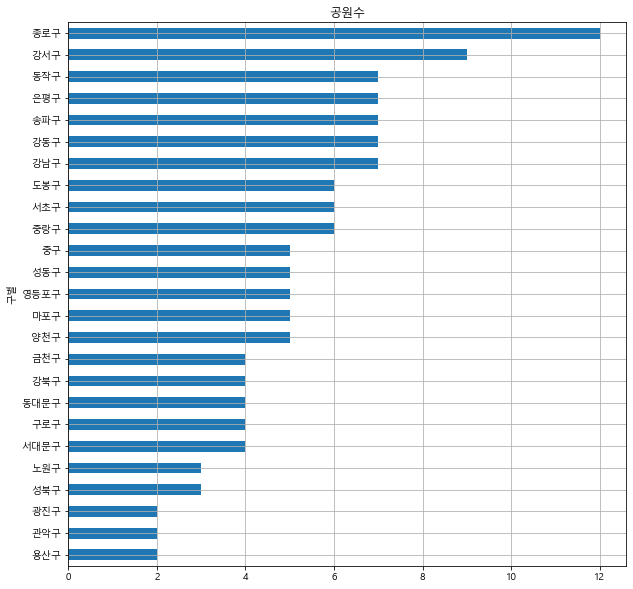

In [15]:
gu_info['공원수'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.title('공원수')
plt.show()

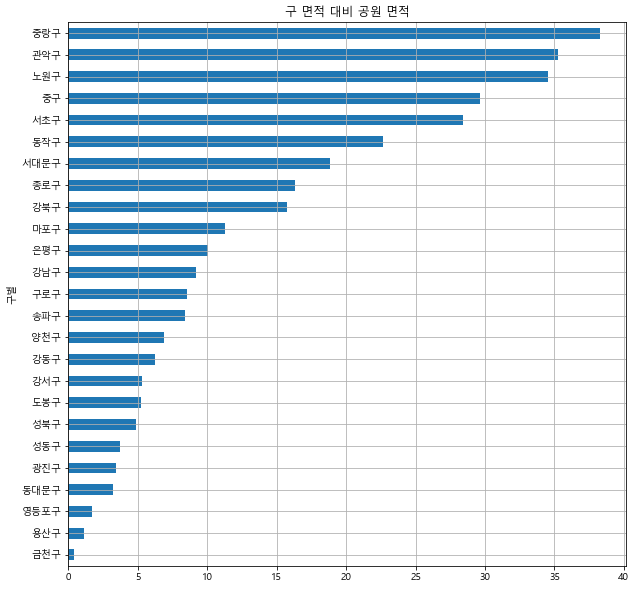

In [16]:
gu_info['공원면적비'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.title('구 면적 대비 공원 면적')
plt.show()

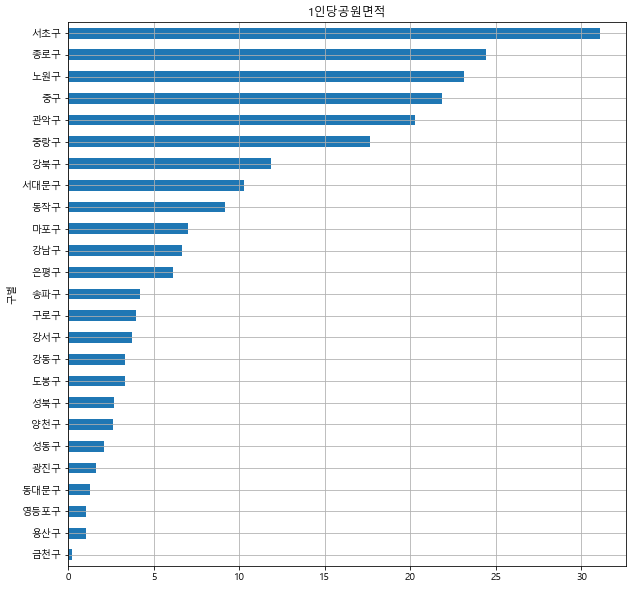

In [17]:
gu_info['1인당공원면적'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.title('1인당공원면적')
plt.show()

### 데이터 정규화

In [18]:
from sklearn import preprocessing

col = ['인구수', '외국인', '고령자', '공원수', '면적', '공원면적합', '1인당공원면적']

x = gu_info[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
gu_info_norm = pd.DataFrame(x_scaled, columns=col, index=gu_info.index)
gu_info_norm.head()

,인구수,외국인,고령자,공원수,면적,공원면적합,1인당공원면적
구별,,,,,,,
종로구,0.045296,0.276961,0.060854,1.0,0.376823,0.289437,0.785265
중구,0.000000,0.263922,0.000000,0.3,0.000000,0.217690,0.700216
용산구,0.202515,0.463428,0.231719,0.0,0.321718,0.014255,0.025246
성동구,0.309178,0.178516,0.310927,0.3,0.186386,0.042796,0.059674
광진구,0.418585,0.417208,0.379795,0.0,0.191788,0.039575,0.044846


### 상관관계 분석

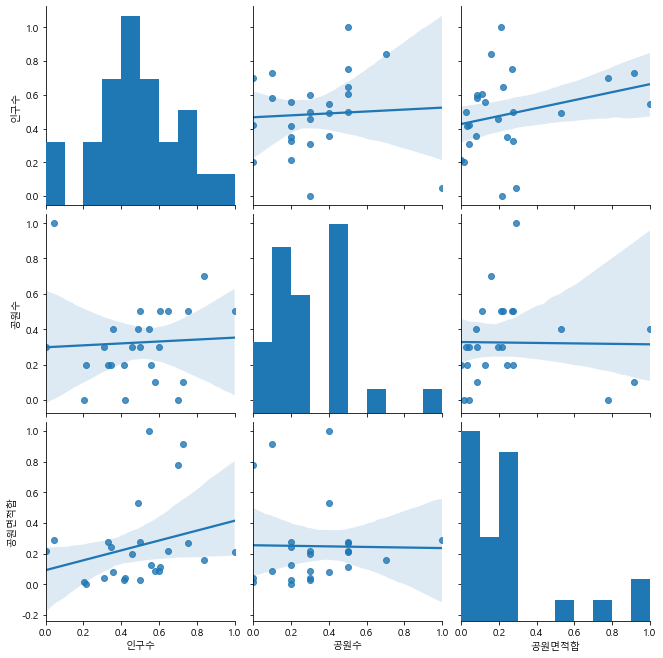

In [19]:
sns.pairplot(gu_info_norm, vars=['인구수', '공원수', '공원면적합'], kind='reg', size=3)
plt.show()

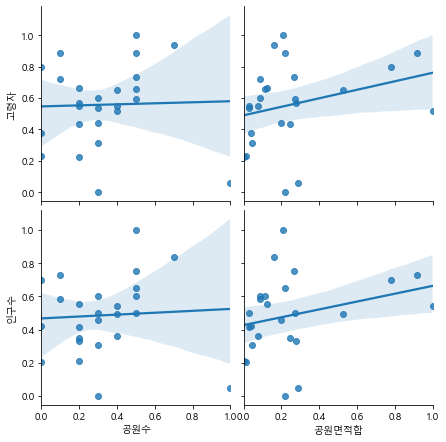

In [20]:
sns.pairplot(gu_info_norm, x_vars=['공원수', '공원면적합'], y_vars=['고령자', '인구수'], kind='reg', size=3)
plt.show()

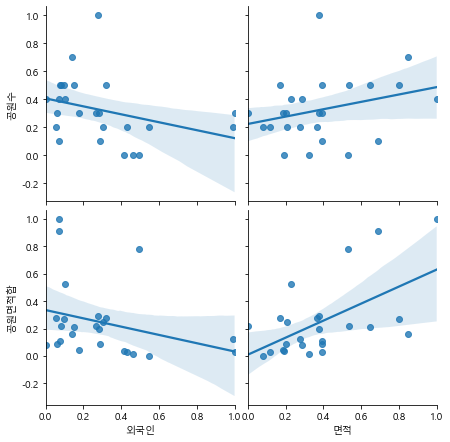

In [21]:
sns.pairplot(gu_info_norm, x_vars=['외국인', '면적'], y_vars=['공원수', '공원면적합'], kind='reg', size=3)
plt.show()

### 히트맵

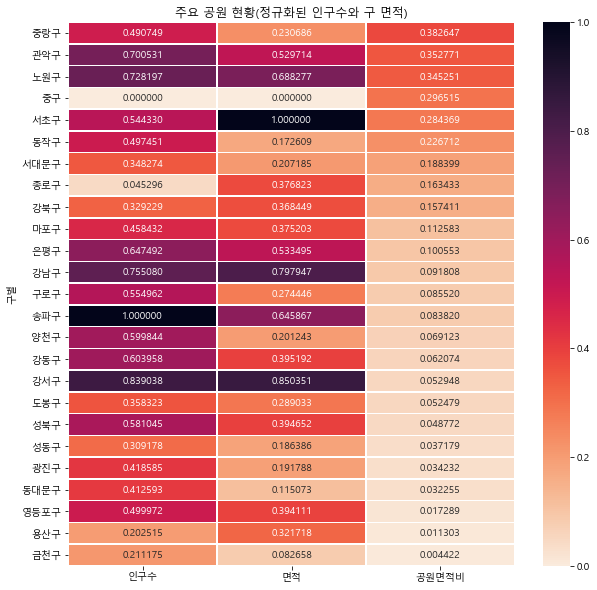

In [22]:
target_col = ['인구수', '면적', '공원면적비']
gu_info_norm['공원면적비'] = gu_info['공원면적비'] / 100

gu_info_norm_sort = gu_info_norm.sort_values(by='공원면적비', ascending=False)

plt.figure(figsize=(10, 10))
cmap = sns.cm.rocket_r
sns.heatmap(gu_info_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap=cmap)
plt.title('주요 공원 현황(정규화된 인구수와 구 면적)')
plt.show()

### 지도에 표시하기

In [24]:
import folium
import json
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf8'))

#### 구별 인구 수 표시

In [25]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data= geo_str, data= gu_info_norm['인구수'], columns= [gu_info_norm.index, gu_info_norm['인구수']], fill_color='PuRd', key_on= 'feature.id')
map

#### 공원 면적 표시

In [26]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in parks.index:
    folium.CircleMarker([parks['위도'][n], parks['경도'][n]], radius= parks['면적'][n] / 100000, color='green', fill_color='green').add_to(map)

map

#### 공원 면적과 구 정보

In [43]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data= geo_str, data= gu_info_norm['1인당공원면적'], columns= [gu_info_norm.index, gu_info_norm['1인당공원면적']], fill_color='PuRd', key_on= 'feature.id')
for n in parks.index:
    if parks['구별'][n] == '강서구':
        if parks['공원크기'][n] == '대':
            folium.CircleMarker(
                location=[parks['위도'][n], parks['경도'][n]],
                color='blue', 
                fill_color='greenyellow',
                popup=parks['공원명'][n],
                tooltip=f'{parks["면적"][n]}㎡, {parks["주소"][n]}',
                radius=20
            ).add_to(map)
        elif parks['공원크기'][n] == '중':
            folium.CircleMarker(        
                location=[parks['위도'][n], parks['경도'][n]],
                color='blue', 
                fill_color='greenyellow',
                popup=parks['공원명'][n],
                tooltip=f'{parks["면적"][n]}㎡, {parks["주소"][n]}',
                radius=10
            ).add_to(map)
        else:
            folium.CircleMarker(
                location=[parks['위도'][n], parks['경도'][n]],
                color='blue', 
                fill_color='greenyellow',
                popup=parks['공원명'][n],
                tooltip=f'{parks["면적"][n]}㎡, {parks["주소"][n]}',
                radius=2
            ).add_to(map)
    else:
        if parks['공원크기'][n] == '대':
            folium.CircleMarker([parks['위도'][n], parks['경도'][n]], radius= 20, color='green', fill_color='green').add_to(map)
        elif parks['공원크기'][n] == '중':
            folium.CircleMarker([parks['위도'][n], parks['경도'][n]], radius= 10, color='green', fill_color='green').add_to(map)
        else:
            folium.CircleMarker([parks['위도'][n], parks['경도'][n]], radius= 2, color='green', fill_color='green').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>1인당 공원면적과 공원 면적</b></h3>'
map.get_root().html.add_child(folium.Element(title_html))

map

In [47]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

p = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data= geo_str, data= gu_info['공원면적비'], columns= [gu_info.index, gu_info['공원면적비']], fill_color='PuRd', key_on= 'feature.id')
for n in parks.index:
    if parks['구별'][n] == '강서구':
        if parks['공원크기'][n] == '대':
            folium.CircleMarker(
                location=[parks['위도'][n], parks['경도'][n]],
                color='blue', 
                fill_color='greenyellow',
                popup=parks['공원명'][n],
                tooltip=f'{parks["면적"][n]}㎡, {parks["주소"][n]}',
                radius=20
            ).add_to(map)
        elif parks['공원크기'][n] == '중':
            folium.CircleMarker(        
                location=[parks['위도'][n], parks['경도'][n]],
                color='blue', 
                fill_color='greenyellow',
                popup=parks['공원명'][n],
                tooltip=f'{parks["면적"][n]}㎡, {parks["주소"][n]}',
                radius=10
            ).add_to(map)
        else:
            folium.CircleMarker(
                location=[parks['위도'][n], parks['경도'][n]],
                color='blue', 
                fill_color='greenyellow',
                popup=parks['공원명'][n],
                tooltip=f'{parks["면적"][n]}㎡, {parks["주소"][n]}',
                radius=2
            ).add_to(map)
    else:
        if parks['공원크기'][n] == '대':
            folium.CircleMarker([parks['위도'][n], parks['경도'][n]], radius= 20, color='green', fill_color='green').add_to(map)
        elif parks['공원크기'][n] == '중':
            folium.CircleMarker([parks['위도'][n], parks['경도'][n]], radius= 10, color='green', fill_color='green').add_to(map)
        else:
            folium.CircleMarker([parks['위도'][n], parks['경도'][n]], radius= 2, color='green', fill_color='green').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>구별 공원 면적 비율과 공원 면적</b></h3>'
map.get_root().html.add_child(folium.Element(title_html))

map